In [1]:
!mkdir ../checkpoints
!wget https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmsegmentation/models/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth -P ../checkpoints

mkdir: cannot create directory ‘../checkpoints’: File exists
--2020-07-07 08:54:25--  https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmsegmentation/models/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth
Resolving open-mmlab.s3.ap-northeast-2.amazonaws.com (open-mmlab.s3.ap-northeast-2.amazonaws.com)... 52.219.58.55
Connecting to open-mmlab.s3.ap-northeast-2.amazonaws.com (open-mmlab.s3.ap-northeast-2.amazonaws.com)|52.219.58.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196205945 (187M) [application/x-www-form-urlencoded]
Saving to: ‘../checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth.1’

pspnet_r50-d8_512x1 100%[===================>] 187.12M  16.5MB/s    in 13s     

2020-07-07 08:54:38 (14.8 MB/s) - ‘../checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth.1’ saved [196205945/196205945]



In [1]:
from mmseg.apis import init_segmentor, inference_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

/home/hulk/anaconda3/envs/open-mmlab/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
config_file = '../configs/swin/config_upernet_swin_tiny_patch4_window7_384x384_20k_cracks_lovasz.py'
checkpoint_file = '../work_dirs/config_upernet_swin_tiny_patch4_window7_384x384_20k_cracks_lovasz/latest.pth'

In [ ]:
# Build the model using config file and checkpoint file
from mmcv import Config
cfg = Config.fromfile(config_file)

# Modify losses for inference. Lovasz loss throws arg errors during inference
cfg.model.decode_head.loss_decode = dict(type='CrossEntropyLoss', use_sigmoid=False, loss_weight=0.0)
cfg.model.auxiliary_head.loss_decode = dict(type='CrossEntropyLoss', use_sigmoid=False, loss_weight=0.0)
  # If aux head exists

model = init_segmentor(cfg, checkpoint_file, device='cuda:0')

Use load_from_local loader


In [ ]:
# test a single image
img = '../data/cracks/test/3.jpg'
result = inference_segmentor(model, img)

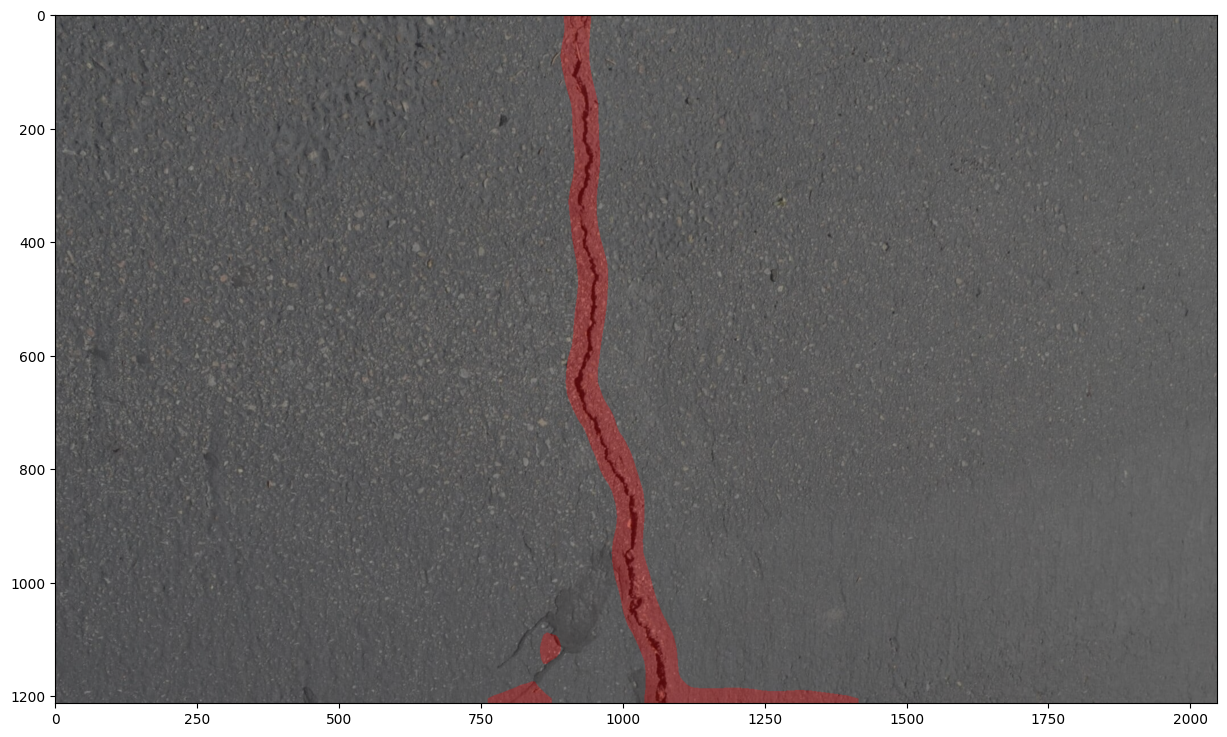

In [99]:
# show the results
model.CLASSES = ('Background', 'Crack')
show_result_pyplot(model, img, result, palette=[[50, 50, 50], [150, 0, 0]])